# PCA

In [1]:
import glob
import numpy as np
import pandas as pd
import numpy.linalg as la
import matplotlib.pyplot as plt
import PIL
import scipy.io as sci
import matplotlib.colors as colors
import numpy.random as npr
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
%matplotlib inline

### 1. Data Preprocessing 

In [34]:
# Load the training and testing data
train_data = pd.read_excel('/Users/nancyzhang/Desktop/UCLA/SeniorFall/Math156/FinalProj/TrainFull.xlsx') 
test_data = pd.read_excel('/Users/nancyzhang/Desktop/UCLA/SeniorFall/Math156/FinalProj/TestFull.xlsx')
# Eliminate the column 'year' to avoid problems in standardization
columns_to_keep = ['Life Ladder', 'Log GDP per capita', 'Healthy life expectancy at birth',
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Social support']
train_data = train_data.filter(columns_to_keep)
test_data = test_data.filter(columns_to_keep)

In [35]:
train_data.shape

(834, 10)

In [36]:
# Further split into X_train, Y_train, X_test, Y_test
X_train = train_data.iloc[:,0:9]
Y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,0:9]
Y_test = test_data.iloc[:,-1]

### 2. Implement PCA on training data 

In [37]:
# Standarize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [38]:
# Center the data for PCA
mu = np.mean(X_train,axis = 0, keepdims = True)
X_train_tilde = X_train - mu
X_train_tilde.shape

(834, 9)

In [39]:
S = X_train_tilde.T@X_train_tilde

D, V = np.linalg.eig(S)

# sort D, and then sort V the same way to get the eigenvectors in descending order
order = D.argsort()[::-1]
V = V[:, order]

U = X_train_tilde@V

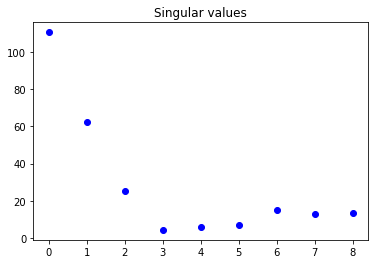

In [40]:
plt.plot(D,'bo')
plt.title('Singular values')
plt.show()

We can see that the "drop" of the plot becomes slow after the third singular value, so we know that the first three principal components cover the majority of the variance within the data. We can also confirm this by calculating the variance.

In [41]:
# Variance of the first two PCs
variance = (D[0]+D[1])/np.sum(D)
variance

0.6732929507670499

In [42]:
# Variance of the first three PCs
variance = (D[0]+D[1]+D[2])/np.sum(D)
variance

0.7705151222333501

In [43]:
# Variance of the first four PCs
variance = (D[0]+D[1]+D[2]+D[3])/np.sum(D)
variance

0.7873355550282444

The total variance doesn't change much after including the fourth principal component, so we know that the first three principal components, or eigenvectors, count for most of the variance (77.1%) of the data.